### 1. Diabetes Dataset

In [57]:
import pandas as pd

# "Diabetes Dataset" представляет собой набор данных о 768-и пациентках индийского происхождения
# старше 21 года, часть из которых больна диабетом.
# Датасет предназначен для выявления факторов, связанных с развитием диабета.

diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.info()

# Описание полей:
# - Pregnancies - количество беременностей,
# - Glucose - концентрация глюкозы в плазме крови через 2 часа,
# - BloodPressure - диастолическое кровяное давление (мм рт. ст.),
# - SkinThickness - толщина кожной складки трицепса (мм),
# - Insulin - 2-часовой сывороточный инсулин (ме Ед/мл),
# - BMI - индекс массы тела,
# - DiabetesPedigreeFunction - функция, определяющая риск развития диабета,
# - Age - возраст,
# - Outcome - признак наличия диабета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
diabetes_df.describe()

# Из статистических данных мы видим, что 25-й квантиль для полей SkinThickness и Insulin равен 0.
# Мы можем сделать вывод, что возможно, данные поля не стоит учитывать при определении зависимостей.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
# Узнаем - сколько точно нулевых значений в таблице по полям SkinThickness и Insulin.
# Если % незаполненных значений > 30, то удалим эти поля

filter = diabetes_df['SkinThickness'] == 0
zero_percent = round(diabetes_df[filter]['SkinThickness'].count() / diabetes_df.shape[0] * 100, 2)
print('SkinThickness', zero_percent)

filter = diabetes_df['Insulin'] == 0
zero_percent = round(diabetes_df[filter]['Insulin'].count() / diabetes_df.shape[0] * 100, 2)
print('Insulin', zero_percent)

SkinThickness 29.56
Insulin 48.7


In [60]:
# Для поля Insulin почти половина данных равно 0, поэтому удлим его из датафрейма
diabetes_df.drop('Insulin', axis=1, inplace=True)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Text(0.5, 1.0, 'Соотношение между здоровыми и больными диабетом')

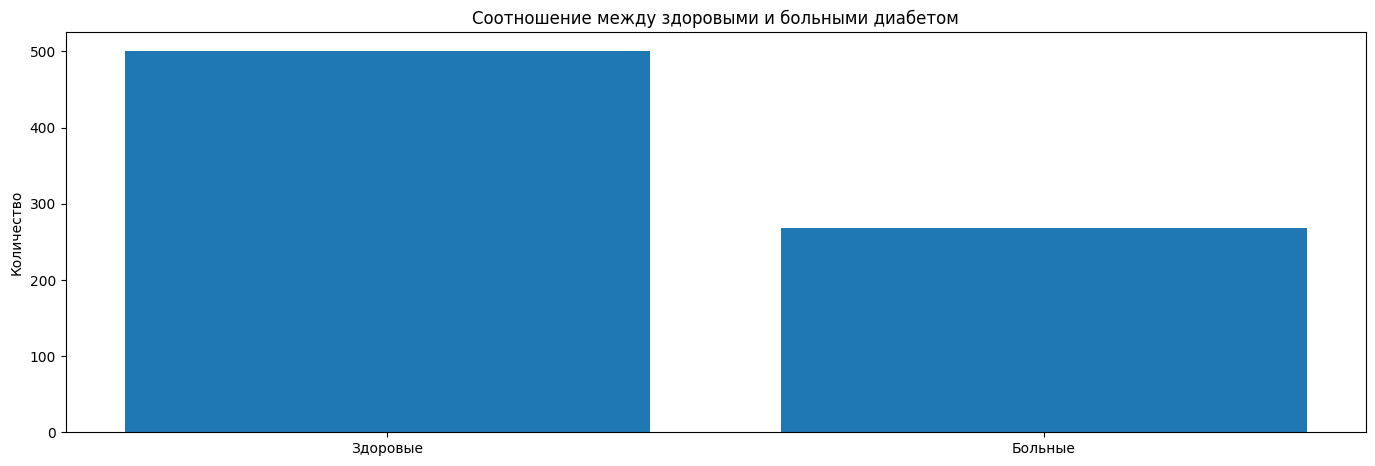

In [61]:
# Построим столбчатую диаграмму, чтобы увидеть соотношение больных людей и здоровых.
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

bar_data = diabetes_df.groupby(by='Outcome')['Outcome'].count()
bar_data = bar_data.rename(index={0: 'Здоровые', 1: 'Больные'})
         
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = bar_data.index, height = bar_data)
main_axes.set_ylabel('Количество')
main_axes.set_title('Соотношение между здоровыми и больными диабетом')

# Здоровых людей в выборке примерно в 2 раза больше больных

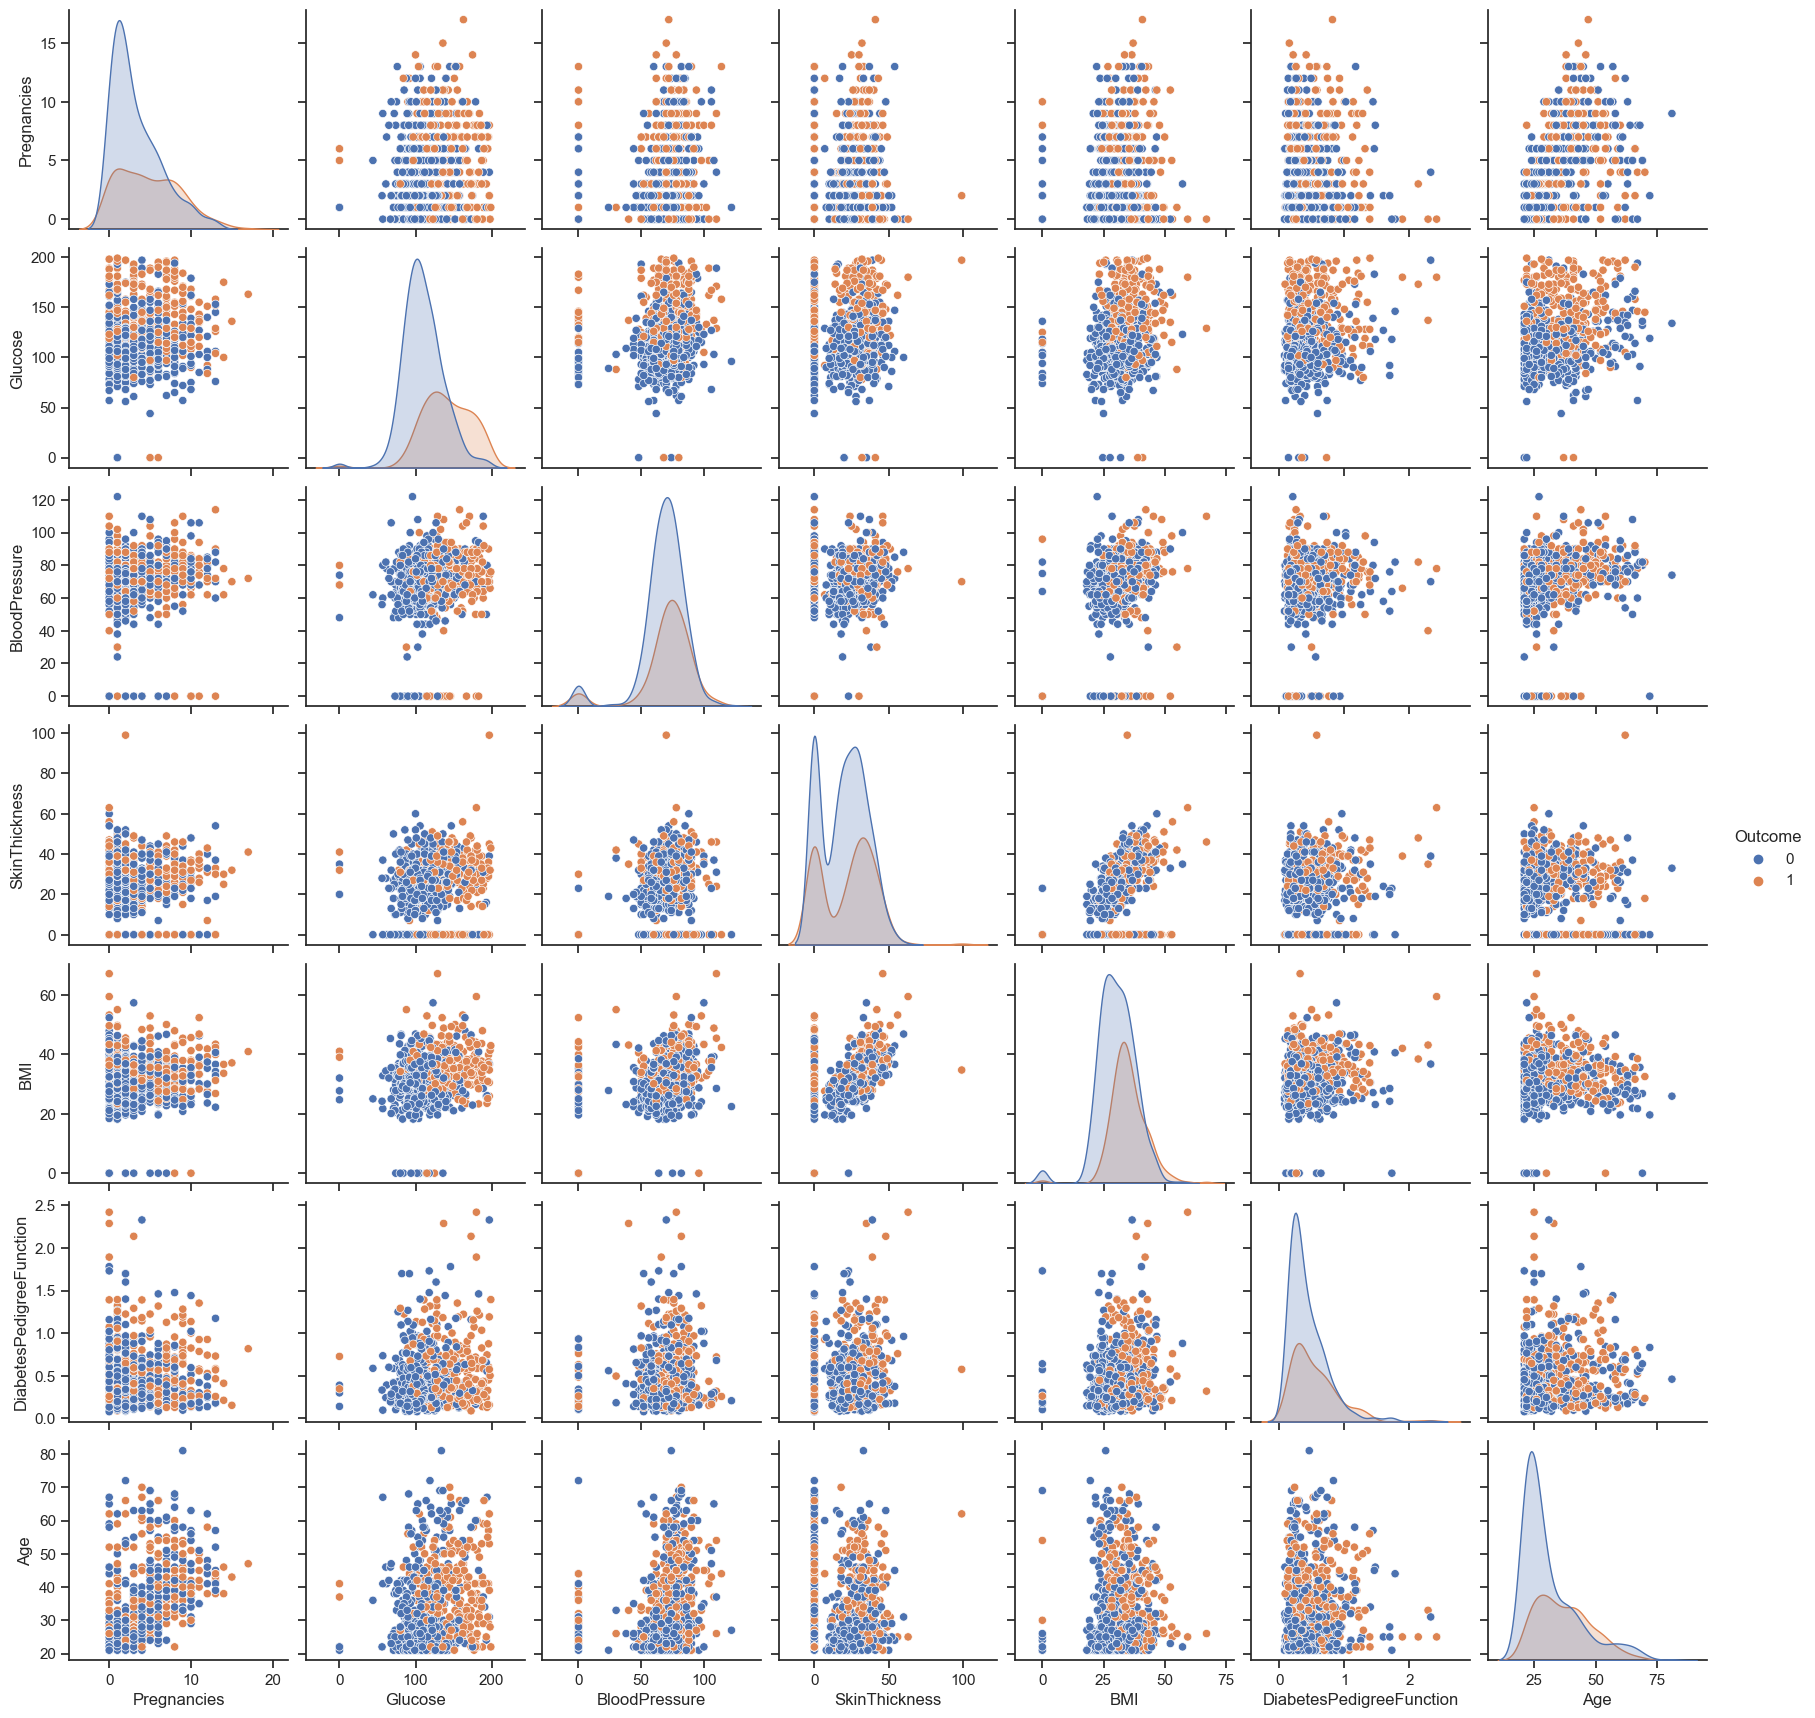

In [68]:
# Попробуем найти закономерность между числовыми характеристиками и наличием диабета.
# Построим для этого матрицу диаграмм рассеяния, чтобы наглядно видеть зависимость всех признаков.
sns.set_theme(style="ticks")
sns.pairplot(diabetes_df, hue="Outcome")

In [ ]:
# Из матриц диаграмм рассеяния можно сделать вывод, что одним из факторов, влияющих на наличие диабета, 
# является уровень глюкозы. Такой вывод можно сделать, посмотрев на вторую строку матрицы 
# - признаки диабета (точки оранжевого цвета) сконцентрированы в верхней части графика. Что говорит о том, что
# чем выше уровень глюкозы, тем больше шансов, что пациент болен. Также явно сдвинута вершина гистограммы вправо
# по сравнению со здоровым распределением.

# Возраст тоже повышает риск развития диабета. Мы видим, что в диапазоне 45-55 лет количество заболевших превысило
# количество здоровых.

# Ещё одним признаком, оказывающим небольшое влияние на наличие диабета, является индекс массы тела (BMI).
# Его мы можем наблюдать в пятом столбце матрицы. Наблюдается небольшая прямая зависимость - чем больше индекс
# массы тела, тем больше наблюдений с положительным результатом теста.

### 2. Cardio Dataset

In [73]:
# Датасет предназначен для прогнозирования риска развития ишемической болезни сердца (ИБС) в ближайшие 10 лет.
# Он представляет собой данные о 4238 пациентах разного пола и возраста, проживающих в Массачусетсе.
# Датасет разделен на 2 файла: train.csv (3390 записей) и test.csv (848 записей). Файл test.csv не содержит
# данных о результатах прогноза.  

train_df = pd.read_csv('data/cardiovascular/train.csv')
test_df = pd.read_csv('data/cardiovascular/test.csv')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [74]:
# Проведем анализ файла train.csv
train_df.describe()

# Из статистических данных мы видим, что 25-й квантиль заполнен для всех непрерывных числовых значений.
# Поэтому, полей подлежащих удалению (где больше 30% нулевых значений) нет.

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


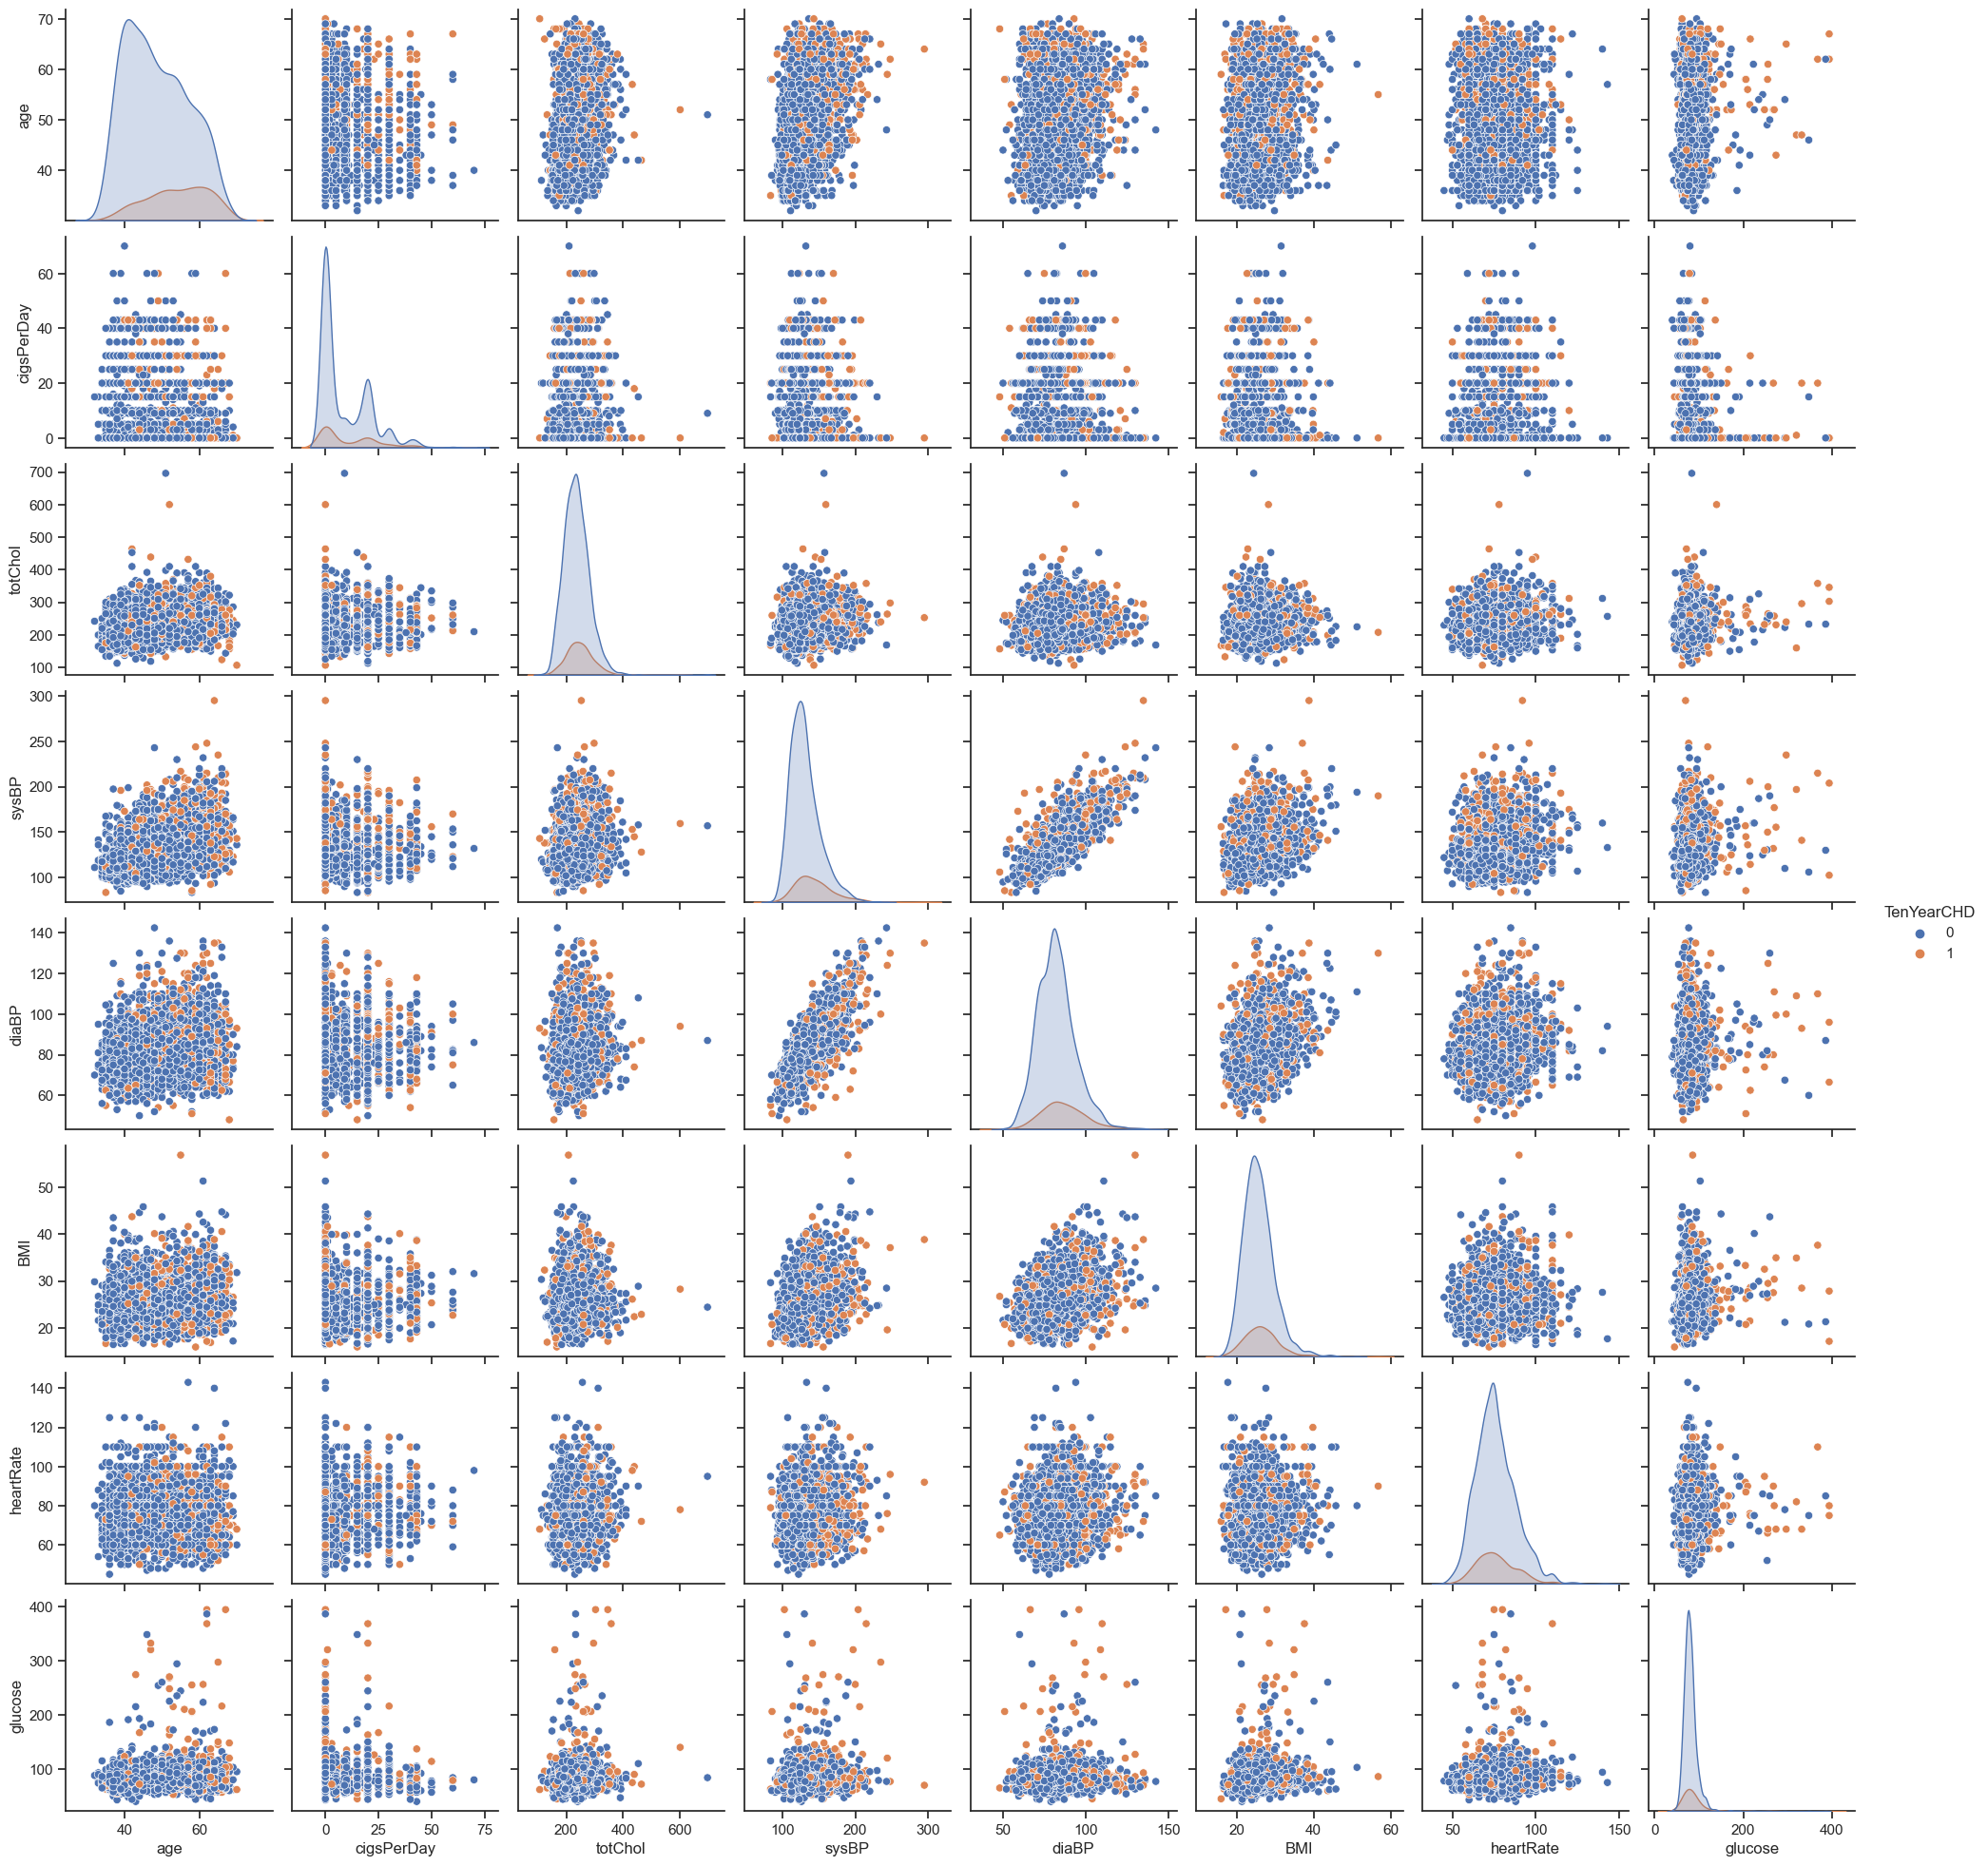

In [91]:
# Попробуем найти закономерность между числовыми непрерывными характеристиками и риском заболеть ИБС.
# Построим для этого матрицу диаграмм рассеяния, чтобы наглядно видеть зависимость всех признаков.
sns.pairplot(
    train_df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']],
    hue='TenYearCHD')

In [ ]:
# Из матрицы мы можем сделать вывод, что с увеличением возраста повышается риск развития ИСБ. Вершина гистограммы
# наблюдений пациентов в зоне риска явно сдвинута по сравнению со здоровыми.

# Также плохим прогнозом могут быть высокие значения систолического (sysBP) и диастолического (diaBP) артериального давления.